### Principal components regression
Copied from: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
#### 6.7.1

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error


df = pd.read_csv('hitters.csv').dropna()
df = df.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1)

# Set y = salary
y = df.Salary
# Set X = rest (except salary)
X = df.drop(['Salary'], axis=1)

# Define the feature set X.
#X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
print("Entire df:")
display(df.head(3))
print("\n\nX:")
display(X.head(3))
print("\n\nX scaled:")
pd.DataFrame(scale(X)).loc[:3,:]

Entire df:


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0




X:


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3




X scaled:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.602900,-0.595675,-0.528551,-1.206112,-0.522063,-0.097527,1.397893,0.346791,0.174373,-0.002920,-0.121671,0.258966,0.435334,1.221499,-0.523191,0.213352
1,0.512542,0.492260,0.729966,0.441515,0.794060,1.609373,-0.901200,-0.452865,-0.409892,-0.076054,-0.415105,-0.199590,0.010373,2.109109,-0.253863,0.819964
2,0.628167,0.736490,0.958788,0.402286,1.026317,-0.189792,0.770868,1.301558,1.318174,1.898565,1.412051,1.572666,0.355654,-0.324661,-0.744179,-0.848219
3,-0.562092,-0.462459,-0.185319,-0.617673,-0.367225,-0.512719,-1.110209,-0.990935,-0.960153,-0.697693,-0.947521,-0.881228,-0.862315,1.840678,-0.543909,-0.696566


In [2]:
#z = [0, 1, 10, 1, 10, 0, 10, 0, 10, 0]
#print(z)
## Center to the mean and component wise scale to unit variance.
#print(scale(z))
#z_m = [np.mean(z)]*len(z)
#z_c = scale(z);
#z_cm = [np.mean(z_c)]*len(z_c)
#
## Create plots with pre-defined labels.
#fig, ax = plt.subplots()
#ax.plot(z  , 'k', label='z')
#ax.plot(z_m, 'b:', label='z_m')
#ax.plot(z_c, 'r', label='z_c')
#ax.plot(z_cm, 'g:', label='z_cm')
#legend = ax.legend(loc='upper left', shadow=True)
#plt.show()

In [3]:
pca = PCA()
# scale() = Center to the mean and component wise scale to unit variance.
# transform() = ???
X_reduced = pca.fit_transform(scale(X))
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.196209,-0.391118,0.070293,-0.057195,0.104179,0.269548,-0.016113,0.149537,-0.145367,-0.041545,0.247100,0.562495,-0.511186,0.133774,-0.109159,0.052412
1,0.193644,-0.383922,0.050152,-0.071087,0.132262,0.389942,-0.064148,0.130241,-0.105187,-0.005018,0.213761,-0.003955,0.720020,-0.173975,0.043906,-0.097414
2,0.201534,-0.235943,-0.339900,-0.167692,-0.493727,-0.238766,0.126372,-0.350820,0.362539,-0.067911,-0.049576,0.368144,0.201036,0.040094,-0.059753,-0.024803
3,0.195226,-0.381179,-0.063822,-0.126912,0.213325,0.119529,-0.161753,0.023760,0.471916,-0.362783,-0.226318,-0.477608,-0.212045,0.158693,0.049801,0.060117
4,0.232769,-0.318169,-0.168631,-0.115430,-0.303608,-0.005614,0.120812,-0.168620,-0.446228,0.407922,0.055845,-0.477915,-0.237844,-0.095462,0.066881,0.019795


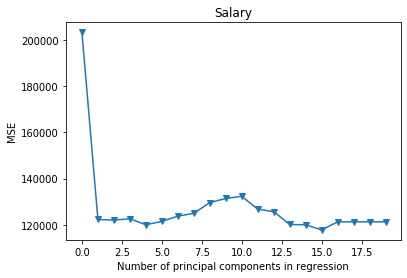

In [4]:
# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [5]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 45.31,  71.  ,  81.8 ,  87.24,  91.6 ,  94.8 ,  96.37,  97.53,
        98.36,  98.97,  99.35,  99.69,  99.87,  99.96,  99.99, 100.  ])

139025.80819897805

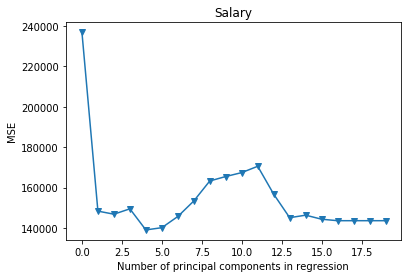

In [20]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1);

In [53]:
pcaMinMSE = int(np.where(mse == np.amin(mse))[0])
print(pcaMinMSE)

X_reduced_test = pca2.transform(scale(X_test))[:,:pcaMinMSE]

# Train regression model on training data
regr = LinearRegression()
regr.fit(X_reduced_train[:,:pcaMinMSE], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

4


117161.9404553147

### Partial least squares
#### 6.7.2

In [54]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Salary')
plt.xlim(xmin=-1)

C:\Users\Malle\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Invalid number of components: 17

In [10]:
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

110237.80237089914